In [1]:
import pandas as pd
import numpy as np
D = pd.read_csv("fatal-police-shootings-data.csv")
D

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,6340,NaN,2020-11-27,shot,gun,NaN,M,NaN,Wilsonville,OR,True,other,NaN,False,-122.834,45.278,True
5846,6339,Cory Donell Truxillo,2020-11-29,shot,gun,43.0,M,B,Houma,LA,True,attack,Not fleeing,False,-90.730,29.602,True
5847,6363,NaN,2020-11-30,shot,BB gun,NaN,M,NaN,Phoenix,AZ,False,attack,Not fleeing,False,-112.112,33.495,True
5848,6364,Adam Lee Mendez,2020-11-30,shot,knife,38.0,M,NaN,San Angelo,TX,False,other,Not fleeing,False,-100.475,31.469,True


In [2]:
dat=[]
for date in D['date']:
    dat.append(date[0:4])
D['year']=dat

In [3]:
D['year'].value_counts()

2019    999
2015    994
2018    990
2017    986
2016    961
2020    920
Name: year, dtype: int64

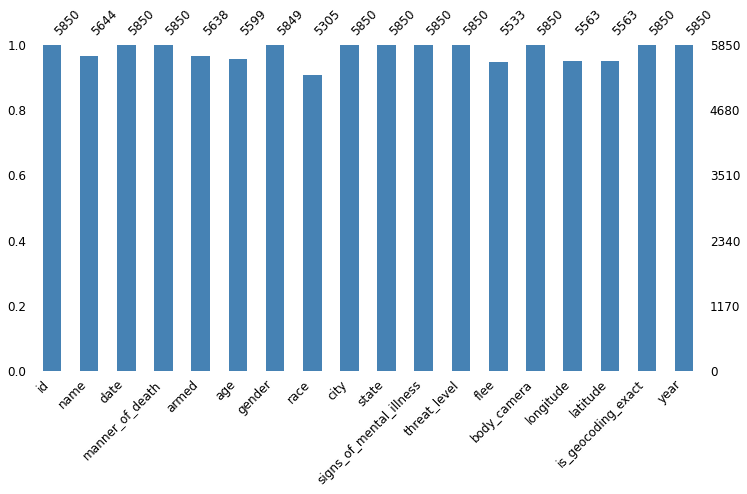

In [4]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(D, figsize=(12, 6), fontsize=12, color='steelblue')

In [5]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5850 non-null   int64  
 1   name                     5644 non-null   object 
 2   date                     5850 non-null   object 
 3   manner_of_death          5850 non-null   object 
 4   armed                    5638 non-null   object 
 5   age                      5599 non-null   float64
 6   gender                   5849 non-null   object 
 7   race                     5305 non-null   object 
 8   city                     5850 non-null   object 
 9   state                    5850 non-null   object 
 10  signs_of_mental_illness  5850 non-null   bool   
 11  threat_level             5850 non-null   object 
 12  flee                     5533 non-null   object 
 13  body_camera              5850 non-null   bool   
 14  longitude               

In [6]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()

# Import the dataset into H2O:
D = h2o.import_file("../Final Project/fatal-police-shootings-data.csv")
D = D.na_omit()
D

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 min 47 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,2 months and 9 days
H2O_cluster_name:,H2O_from_python_fanyangxin_6bupdl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.999 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
3,Tim Elliot,2015-01-02 00:00:00,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
4,Lewis Lee Lembke,2015-01-02 00:00:00,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
5,John Paul Quintero,2015-01-03 00:00:00,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
8,Matthew Hoffman,2015-01-04 00:00:00,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
9,Michael Rodriguez,2015-01-04 00:00:00,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
11,Kenneth Joe Brown,2015-01-04 00:00:00,shot,gun,18,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
13,Kenneth Arnold Buck,2015-01-05 00:00:00,shot,gun,22,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True
15,Brock Nichols,2015-01-06 00:00:00,shot,gun,35,M,W,Assaria,KS,False,attack,Not fleeing,False,-97.564,38.704,True
16,Autumn Steele,2015-01-06 00:00:00,shot,unarmed,34,F,W,Burlington,IA,False,other,Not fleeing,True,-91.119,40.809,True
17,Leslie Sapp III,2015-01-06 00:00:00,shot,toy weapon,47,M,B,Knoxville,PA,False,attack,Not fleeing,False,-79.991,40.413,True


In [7]:
train = D[~D['race'].isna()]
test = D[D['race'].isna()]

In [8]:
training_columns = ['armed', 'city','gender', 'state', 'flee','signs_of_mental_illness', 'threat_level', 'body_camera','age']
response_column = 'race'
train['race'] = train['race'].asfactor()
test['race'] = test['race'].asfactor()

In [9]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=training_columns, y=response_column, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_per_class_error,logloss,rmse,mse
GBM_4_AutoML_20201208_113334,0.677884,1.03664,0.570907,0.325935
GBM_3_AutoML_20201208_113334,0.679328,1.01763,0.567577,0.322144
GBM_2_AutoML_20201208_113334,0.679633,0.995123,0.564871,0.319079
XGBoost_3_AutoML_20201208_113334,0.681765,0.98877,0.573489,0.32889
DRF_1_AutoML_20201208_113334,0.684906,1.81059,0.571839,0.327
GBM_1_AutoML_20201208_113334,0.686407,0.997892,0.57186,0.327023
GBM_5_AutoML_20201208_113334,0.693225,0.975986,0.564404,0.318552
XGBoost_1_AutoML_20201208_113334,0.725607,1.03247,0.58359,0.340578
XGBoost_2_AutoML_20201208_113334,0.728666,1.03833,0.588051,0.345804
GLM_1_AutoML_20201208_113334,0.772868,1.06944,0.615026,0.378257


In [10]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_4_AutoML_20201208_113334


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,33.0,198.0,693417.0,10.0,10.0,10.0,28.0,211.0,113.91919




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.07324339445592276
RMSE: 0.2706351685496967
LogLoss: 0.26784601066850533
Mean Per-Class Error: 0.06824099512529075

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,A,B,H,N,O,W,Error,Rate
0,70.0,1.0,5.0,0.0,0.0,1.0,0.090909,7 / 77
1,1.0,1146.0,23.0,0.0,0.0,34.0,0.048173,"58 / 1,204"
2,1.0,23.0,770.0,0.0,0.0,35.0,0.071170,59 / 829
3,0.0,0.0,0.0,64.0,0.0,4.0,0.058824,4 / 68
4,0.0,0.0,1.0,0.0,37.0,4.0,0.119048,5 / 42
5,0.0,20.0,29.0,0.0,0.0,2249.0,0.021323,"49 / 2,298"
6,72.0,1190.0,828.0,64.0,37.0,2327.0,0.040283,"182 / 4,518"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.959717
1,2,0.994909
2,3,0.999557
3,4,1.000000
4,5,1.000000
5,6,1.000000



ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.32593535590542144
RMSE: 0.5709074845414285
LogLoss: 1.0366398689288698
Mean Per-Class Error: 0.6778844242485978

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,A,B,H,N,O,W,Error,Rate
0,1.0,12.0,21.0,2.0,2.0,39.0,0.987013,76 / 77
1,1.0,529.0,132.0,0.0,2.0,540.0,0.560631,"675 / 1,204"
2,2.0,105.0,360.0,0.0,1.0,361.0,0.565742,469 / 829
3,1.0,3.0,12.0,4.0,0.0,48.0,0.941176,64 / 68
4,0.0,8.0,5.0,0.0,8.0,21.0,0.809524,34 / 42
5,4.0,246.0,208.0,7.0,2.0,1831.0,0.203220,"467 / 2,298"
6,9.0,903.0,738.0,13.0,15.0,2840.0,0.395086,"1,785 / 4,518"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.604914
1,2,0.860558
2,3,0.960159
3,4,0.980080
4,5,0.990261
5,6,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.6049187,0.012637858,0.6050885,0.5862832,0.6006637,0.61904764,0.61351055
1,err,0.39508128,0.012637858,0.3949115,0.41371682,0.39933628,0.3809524,0.38648948
2,err_count,357.0,11.597413,357.0,374.0,361.0,344.0,349.0
3,logloss,1.036625,0.05681697,1.1346838,1.0196177,1.0226692,1.0198435,0.9863109
4,max_per_class_error,1.0,0.0,1.0,1.0,1.0,1.0,1.0
5,mean_per_class_accuracy,0.33190978,0.027717771,0.33075202,0.29559317,0.31711495,0.34888074,0.367208
6,mean_per_class_error,0.6680902,0.027717771,0.669248,0.7044068,0.68288505,0.6511193,0.632792
7,mse,0.3259336,0.0036462212,0.32826084,0.32898667,0.32843542,0.32274094,0.3212442
8,r2,0.9035255,0.0016065829,0.9014173,0.9036196,0.90249234,0.905333,0.9047652
9,rmse,0.5708988,0.0031970541,0.5729405,0.5735736,0.5730929,0.56810296,0.5667841



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
0,,2020-12-08 11:36:43,6.023 sec,0.0,0.833333,1.791759,0.633023
1,,2020-12-08 11:36:43,6.203 sec,5.0,0.636956,1.039133,0.205179
2,,2020-12-08 11:36:43,6.349 sec,10.0,0.520143,0.748350,0.169544
3,,2020-12-08 11:36:43,6.564 sec,15.0,0.444154,0.581672,0.137008
4,,2020-12-08 11:36:44,6.779 sec,20.0,0.379587,0.453480,0.098274
5,,2020-12-08 11:36:44,6.976 sec,25.0,0.334861,0.371883,0.071934
6,,2020-12-08 11:36:44,7.181 sec,30.0,0.292847,0.302498,0.050022
7,,2020-12-08 11:36:44,7.277 sec,33.0,0.270635,0.267846,0.040283



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,city,3904.412354,1.000000,0.457912
1,state,2214.651123,0.567218,0.259735
2,armed,1009.589600,0.258577,0.118405
3,age,883.433105,0.226265,0.103609
4,signs_of_mental_illness,168.594193,0.043180,0.019773
5,flee,135.119675,0.034607,0.015847
6,threat_level,106.985649,0.027401,0.012547
7,body_camera,67.657608,0.017328,0.007935
8,gender,36.121696,0.009252,0.004236
